## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations

## Due: November 10, 2024 by 11:59 PM
### <span style="color: red">Enrique Antunano</span>

Copyright &copy; 2024, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lectures 5 and 6. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of differential equations. To get the full story, an indispensable book is the one by Hirsch and Smale: https://www.amazon.com/Differential-Equations-Dynamical-Systems-Introduction/dp/0123820103
- The material covered here in particular comes from the beginnings of Chapters 1, 2, 3, 3, 6, 12, and 14.

In [4]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch

### 1. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with:
- one term,
- two terms,
- three terms, all the way up to 6 terms.
Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the
approximations get better and better.

In [119]:
# Declare sin(x) formula
x,y,n = sm.symbols("x,y,n")
f   =   sm.sin(x)       # zeroth term
df  =   sm.diff(f,x)    # one term
d2f =   sm.diff(df,x)   # second term
d3f =   sm.diff(d2f,x)  # third term
d4f =   sm.diff(d3f,x)  # fourth term
d5f =   sm.diff(d4f,x)  # fifth term
d6f =   sm.diff(d5f,x)  # fifth term
# lambdify the functions to make them callable
f_lam   = sm.lambdify(x,f)
df_lam  = sm.lambdify([x,y],df)
d2f_lam = sm.lambdify([x,y,n],d2f)
d3f_lam = sm.lambdify([x,y,n],d3f)
d4f_lam = sm.lambdify([x,y,n],d4f)
d5f_lam = sm.lambdify([x,y,n],d5f)
d6f_lam = sm.lambdify([x,y,n],d6f)

df = sm.diff(f,x)*y                             # one term
d2f = (sm.diff(df,x)*(y**n))/sm.factorial(n)    # second term
d3f = (sm.diff(d2f,x)*(y**n))/sm.factorial(n)   # third term
d4f = (sm.diff(d3f,x)*(y**n))/sm.factorial(n)   # fourth term
d5f = (sm.diff(d4f,x)*(y**n))/sm.factorial(n)   # fifth term
d6f = (sm.diff(d5f,x)*(y**n))/sm.factorial(n)   # fifth term

df_lam  = sm.lambdify([x,y],df)
d2f_lam = sm.lambdify([x,y,n],d2f)
d3f_lam = sm.lambdify([x,y,n],d3f)
d4f_lam = sm.lambdify([x,y,n],d4f)
d5f_lam = sm.lambdify([x,y,n],d5f)
d6f_lam = sm.lambdify([x,y,n],d6f)


# Solve each term
one_term = f_lam(0) + (df_lam(0,y))
one_term_lam = sm.lambdify(y,one_term)

second_term = one_term_lam(y) + d2f_lam(0,y,2)
second_term_lam = sm.lambdify(y,second_term)

third_term = second_term_lam(y) + d3f_lam(0,y,3)
third_term_lam = sm.lambdify(y,third_term)

fourth_term = third_term_lam(y) + d4f_lam(0,y,4)
fourth_term_lam = sm.lambdify(y,fourth_term)

fifth_term = fourth_term_lam(y) + d5f_lam(0,y,5)
fifth_term_lam = sm.lambdify(y,fifth_term)

sixth_term = fifth_term_lam(y) + d6f_lam(0,y,6)
sixth_term_lam = sm.lambdify(y,sixth_term)
print(f,",",one_term, ",", second_term,",", third_term)


sin(x) , 1.0*y , 1.0*y , 1.0*y - 0.166666666666667


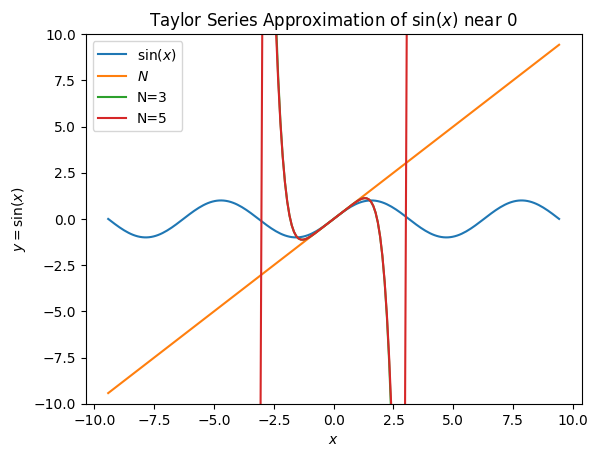

In [101]:
# Plot nth Taylor Polynomials
x = np.linspace(-3*np.pi,3*np.pi,200);
plt.plot(x,np.sin(x),label="$\sin(x)$")
plt.plot(x,x,label="$N$")
# plt.plot(x,second_term_lam(x),label="$x$ - second order term")
plt.plot(x,third_term_lam(x),label="N=3")
# plt.plot(x,fourth_term_lam(x),label="$x - x**3/3!$ - fourth order term")
plt.plot(x,fifth_term_lam(x),label="N=5")
# plt.plot(x,sixth_term_lam(x),label="$x - x**3/3! - x**5/5!$ - sixth order term")
plt.xlabel('$x$')
plt.ylabel('$y = \sin(x)$')
plt.title("Taylor Series Approximation of $\sin(x)$ near 0")
plt.ylim([-10, 10])
plt.legend();

### 2. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$.

Hint: break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$?

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

### 3. Equilibria Points and Linearization

For each of the
following systems:

(i) find the equilibria,

(ii) linearize the system around each equilibrium and find the eigenvalues, and

(iii) state whether the system is stable at each equilibrium.

$$
\mathrm{a)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

### 4. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2.
For what values of $k$ is the system stable?

Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$.

### 5. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$.

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that all points of the form

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points.

c) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane.

### 6. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$, there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable.

**Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

### 7. Simulation

Using simulation and visualization, explain the behavior of the system

$$
\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}
$$

where $a=0.2$, $b=0.2$ and $c=5.7$.